# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [50]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [51]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Numbers of remain columns: 73
Data name: SK_ID_CURR
Data range: [   100002.00 -    456255.00]
Data dist :     278180.52 ~    102790.18

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.50 ~         0.29

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.30 ~        -0.54


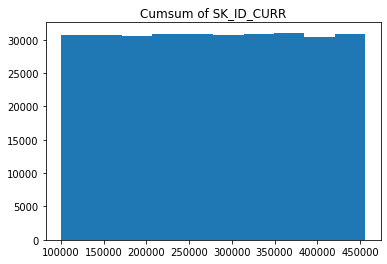

Data name: CNT_CHILDREN
Data range: [        0.00 -        19.00]
Data dist :          0.42 ~         0.72

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.02 ~         0.04

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.66 ~        -1.42


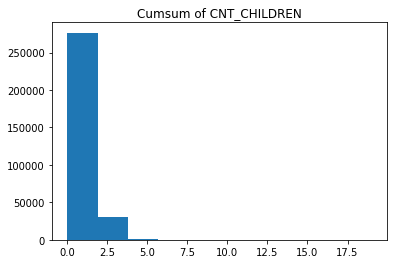

Data name: AMT_INCOME_TOTAL
Data range: [    25650.00 - 117000000.00]
Data dist :     168797.92 ~    237123.15

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.00

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.91 ~        -2.69


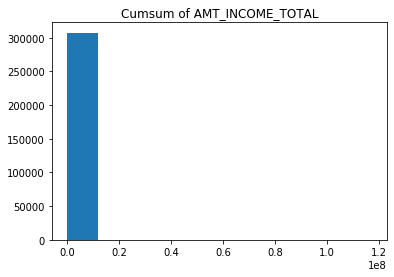

Data name: AMT_CREDIT
Data range: [    45000.00 -   4050000.00]
Data dist :     599026.00 ~    402490.78

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.14 ~         0.10

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.86 ~        -1.00


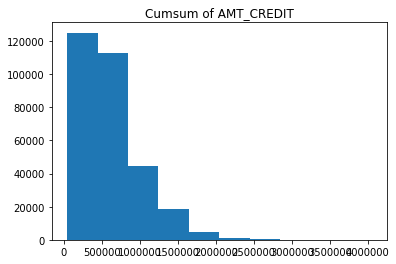

Data name: AMT_ANNUITY
Data range: [     1615.50 -    258025.50]
Data dist :      27108.57 ~     14493.74

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.10 ~         0.06

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.00 ~        -1.25


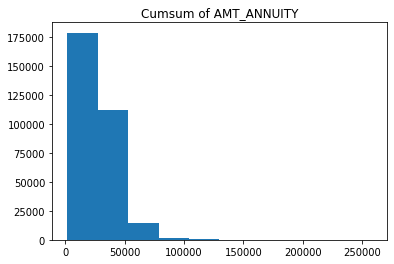

Data name: AMT_GOODS_PRICE
Data range: [    40500.00 -   4050000.00]
Data dist :     538396.21 ~    369446.46

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.12 ~         0.09

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.91 ~        -1.04


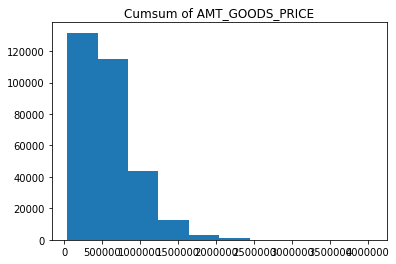

Data name: REGION_POPULATION_RELATIVE
Data range: [        0.00 -         0.07]
Data dist :          0.02 ~         0.01

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.28 ~         0.19

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.55 ~        -0.72


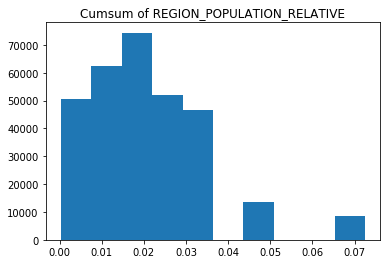

Data name: DAYS_BIRTH
Data range: [   -25229.00 -     -7489.00]
Data dist :     -16037.00 ~      4363.99

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.52 ~         0.25

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.29 ~        -0.61


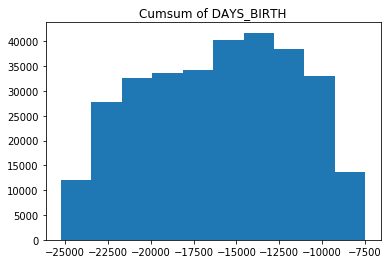

Data name: DAYS_EMPLOYED
Data range: [   -17912.00 -    365243.00]
Data dist :      63815.05 ~    141275.77

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.21 ~         0.37

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.67 ~        -0.43


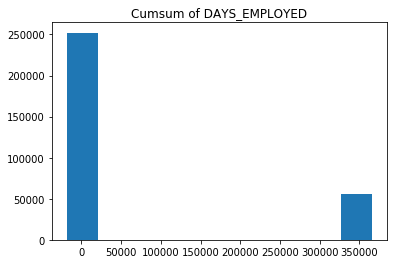

Data name: DAYS_REGISTRATION
Data range: [   -24672.00 -         0.00]
Data dist :      -4986.12 ~      3522.89

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.80 ~         0.14

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.10 ~        -0.85


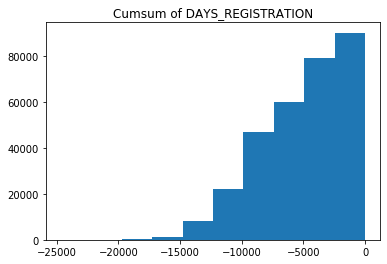

Data name: DAYS_ID_PUBLISH
Data range: [    -7197.00 -         0.00]
Data dist :      -2994.20 ~      1509.45

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.58 ~         0.21

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.23 ~        -0.68


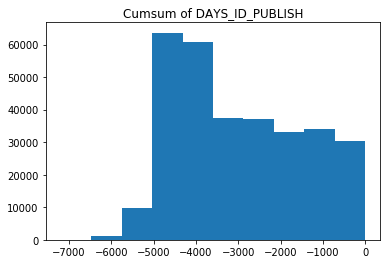

Data name: OWN_CAR_AGE
Data range: [        0.00 -        91.00]
Data dist :         12.06 ~        11.94

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.13 ~         0.13

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.88 ~        -0.88


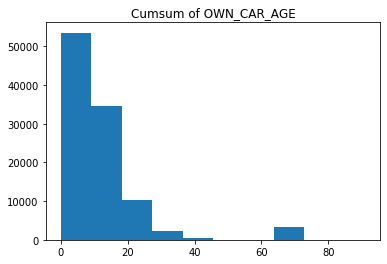

Data name: CNT_FAM_MEMBERS
Data range: [        1.00 -        20.00]
Data dist :          2.15 ~         0.91

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.06 ~         0.05

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.22 ~        -1.32


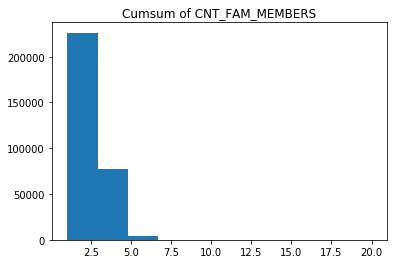

Data name: REGION_RATING_CLIENT
Data range: [        1.00 -         3.00]
Data dist :          2.05 ~         0.51

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.53 ~         0.25

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.28 ~        -0.59


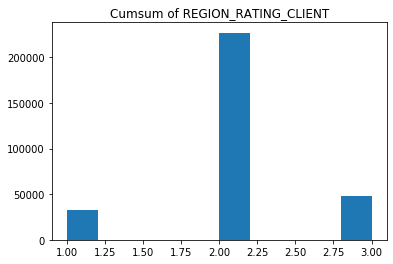

Data name: REGION_RATING_CLIENT_W_CITY
Data range: [        1.00 -         3.00]
Data dist :          2.03 ~         0.50

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.52 ~         0.25

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.29 ~        -0.60


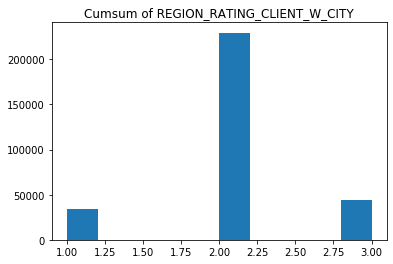

Data name: HOUR_APPR_PROCESS_START
Data range: [        0.00 -        23.00]
Data dist :         12.06 ~         3.27

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.52 ~         0.14

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.28 ~        -0.85


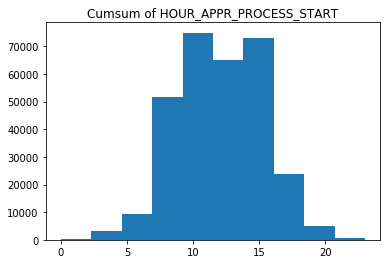

Data name: EXT_SOURCE_1
Data range: [        0.01 -         0.96]
Data dist :          0.50 ~         0.21

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.51 ~         0.22

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.29 ~        -0.65


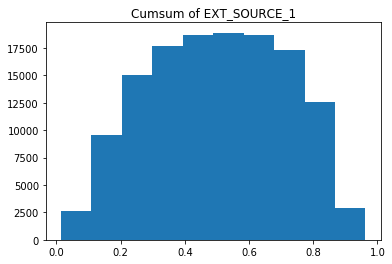

Data name: EXT_SOURCE_2
Data range: [        0.00 -         0.85]
Data dist :          0.51 ~         0.19

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.60 ~         0.22

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.22 ~        -0.65


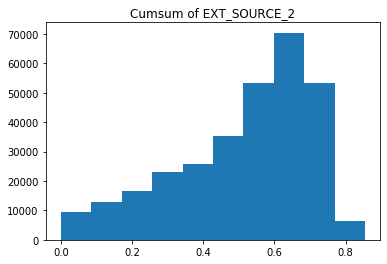

Data name: EXT_SOURCE_3
Data range: [        0.00 -         0.90]
Data dist :          0.51 ~         0.19

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.57 ~         0.22

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.24 ~        -0.66


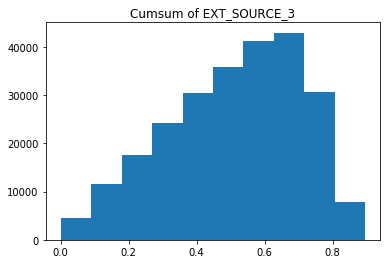

Data name: APARTMENTS_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.12 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.12 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.93 ~        -0.97


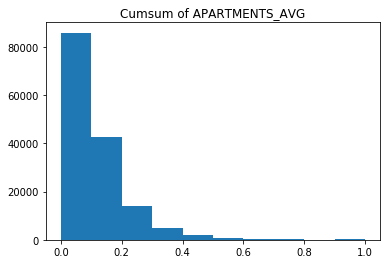

Data name: BASEMENTAREA_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.09 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.09 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.05 ~        -1.08


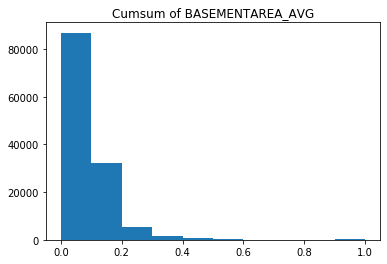

Data name: YEARS_BEGINEXPLUATATION_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.98 ~         0.06

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.98 ~         0.06

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.01 ~        -1.23


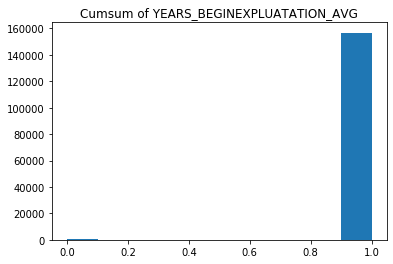

Data name: YEARS_BUILD_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.75 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.75 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.12 ~        -0.95


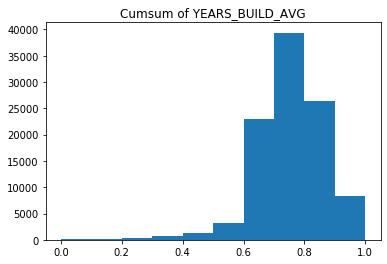

Data name: COMMONAREA_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.04 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.04 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.35 ~        -1.12


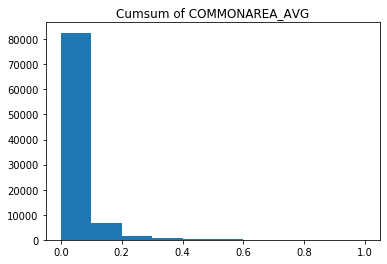

Data name: ELEVATORS_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.08 ~         0.13

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.08 ~         0.13

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.10 ~        -0.87


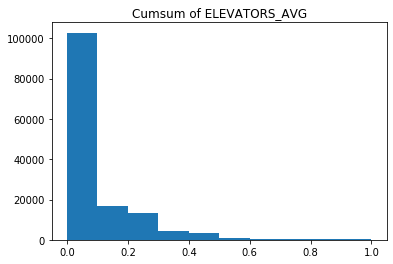

Data name: ENTRANCES_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.15 ~         0.10

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.15 ~         0.10

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.82 ~        -1.00


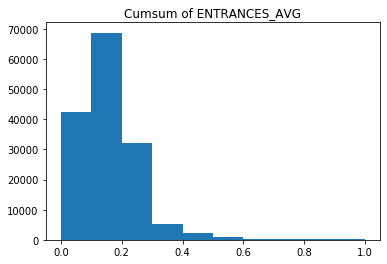

Data name: FLOORSMAX_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.23 ~         0.14

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.23 ~         0.14

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.65 ~        -0.84


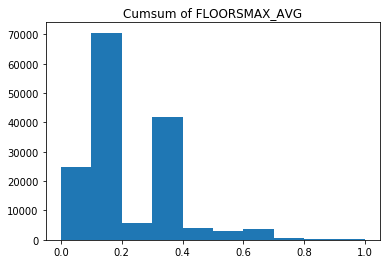

Data name: FLOORSMIN_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.23 ~         0.16

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.23 ~         0.16

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.63 ~        -0.79


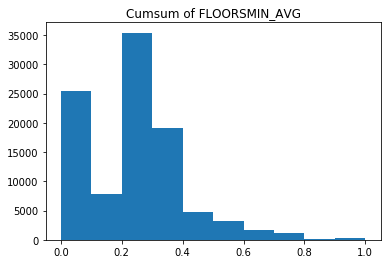

Data name: LANDAREA_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.07 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.07 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.18 ~        -1.09


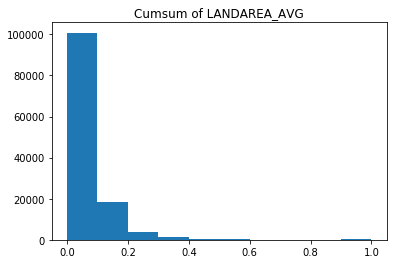

Data name: LIVINGAPARTMENTS_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.10 ~         0.09

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.10 ~         0.09

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.00 ~        -1.03


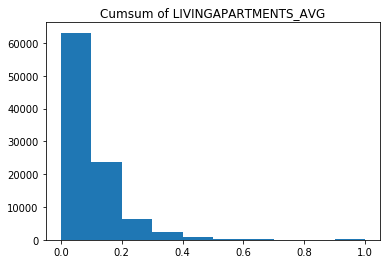

Data name: LIVINGAREA_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.11 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.11 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.97 ~        -0.96


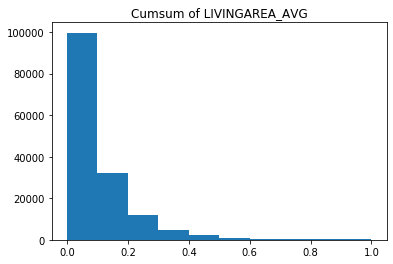

Data name: NONLIVINGAPARTMENTS_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.01 ~         0.05

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.01 ~         0.05

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.06 ~        -1.32


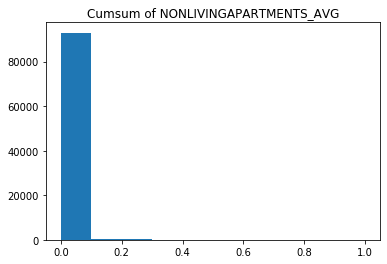

Data name: NONLIVINGAREA_AVG
Data range: [        0.00 -         1.00]
Data dist :          0.03 ~         0.07

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.03 ~         0.07

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.55 ~        -1.16


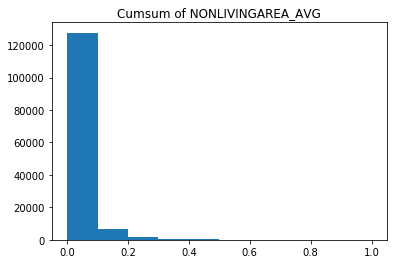

Data name: APARTMENTS_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.11 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.11 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.94 ~        -0.97


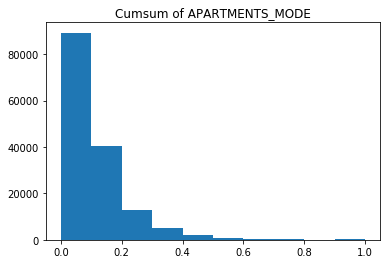

Data name: BASEMENTAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.09 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.09 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.06 ~        -1.07


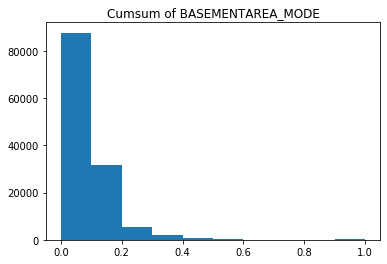

Data name: YEARS_BEGINEXPLUATATION_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.98 ~         0.06

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.98 ~         0.06

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.01 ~        -1.19


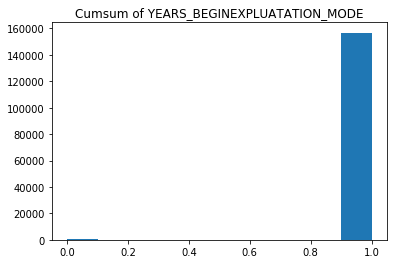

Data name: YEARS_BUILD_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.76 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.76 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.12 ~        -0.96


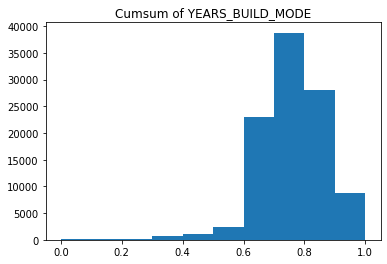

Data name: COMMONAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.04 ~         0.07

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.04 ~         0.07

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.37 ~        -1.13


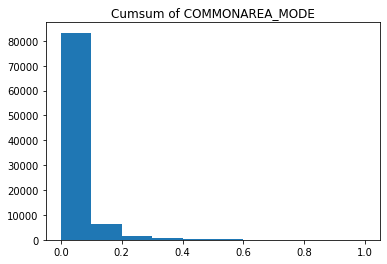

Data name: ELEVATORS_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.07 ~         0.13

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.07 ~         0.13

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.13 ~        -0.88


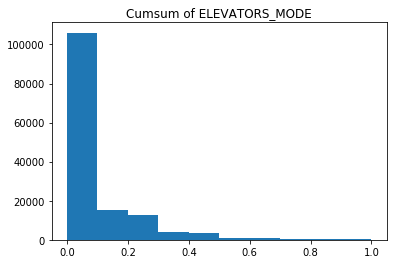

Data name: ENTRANCES_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.15 ~         0.10

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.15 ~         0.10

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.84 ~        -1.00


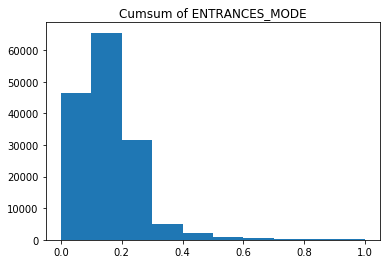

Data name: FLOORSMAX_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.22 ~         0.14

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.22 ~         0.14

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.65 ~        -0.84


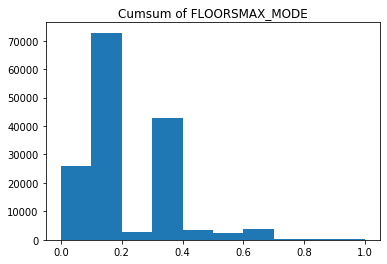

Data name: FLOORSMIN_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.23 ~         0.16

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.23 ~         0.16

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.64 ~        -0.79


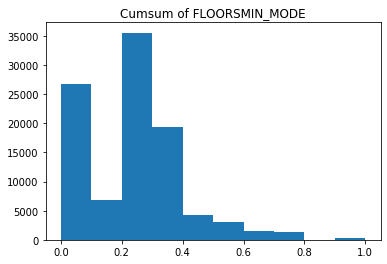

Data name: LANDAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.06 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.06 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.19 ~        -1.09


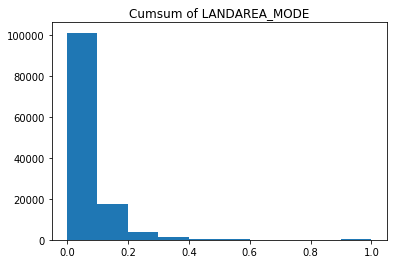

Data name: LIVINGAPARTMENTS_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.11 ~         0.10

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.11 ~         0.10

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.98 ~        -1.01


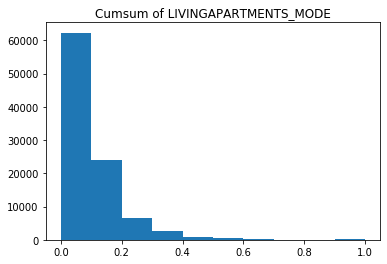

Data name: LIVINGAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.11 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.11 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.97 ~        -0.95


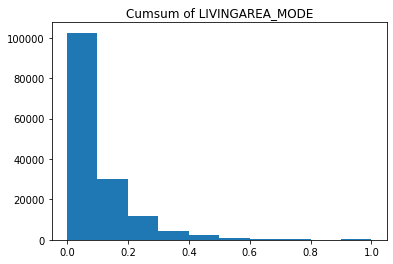

Data name: NONLIVINGAPARTMENTS_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.01 ~         0.05

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.01 ~         0.05

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.09 ~        -1.33


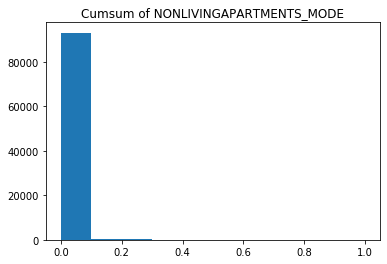

Data name: NONLIVINGAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.03 ~         0.07

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.03 ~         0.07

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.57 ~        -1.15


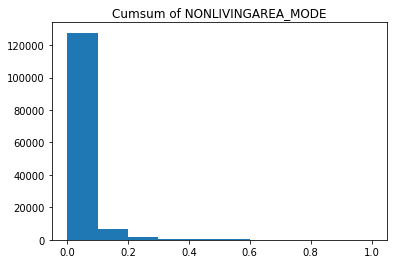

Data name: APARTMENTS_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.12 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.12 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.93 ~        -0.96


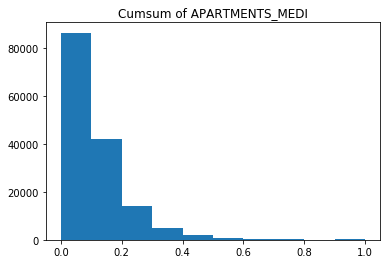

Data name: BASEMENTAREA_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.09 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.09 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.06 ~        -1.09


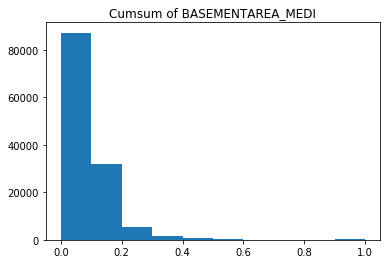

Data name: YEARS_BEGINEXPLUATATION_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.98 ~         0.06

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.98 ~         0.06

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.01 ~        -1.22


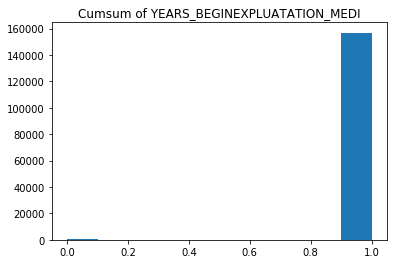

Data name: YEARS_BUILD_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.76 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.76 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.12 ~        -0.95


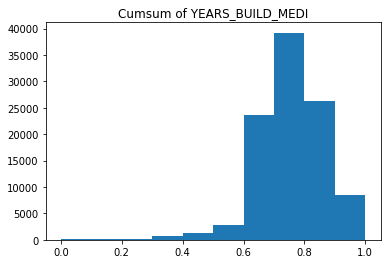

Data name: COMMONAREA_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.04 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.04 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.35 ~        -1.12


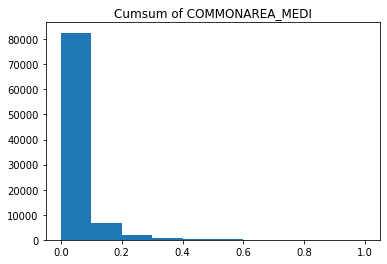

Data name: ELEVATORS_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.08 ~         0.13

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.08 ~         0.13

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.11 ~        -0.87


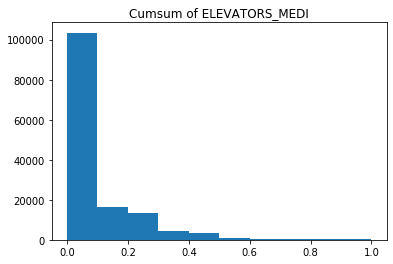

Data name: ENTRANCES_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.15 ~         0.10

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.15 ~         0.10

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.83 ~        -1.00


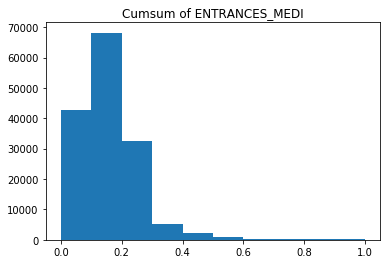

Data name: FLOORSMAX_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.23 ~         0.15

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.23 ~         0.15

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.65 ~        -0.84


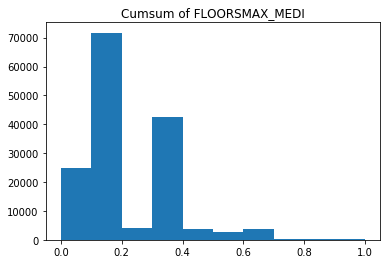

Data name: FLOORSMIN_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.23 ~         0.16

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.23 ~         0.16

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.64 ~        -0.79


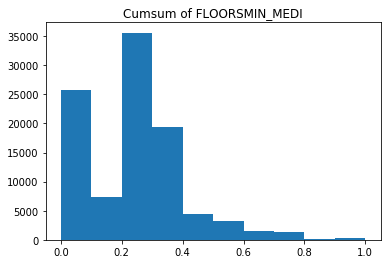

Data name: LANDAREA_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.07 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.07 ~         0.08

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.17 ~        -1.09


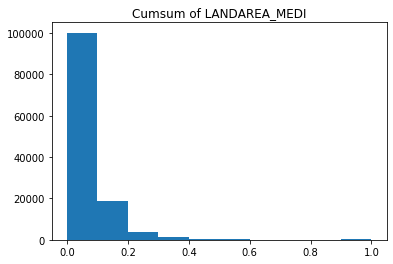

Data name: LIVINGAPARTMENTS_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.10 ~         0.09

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.10 ~         0.09

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.99 ~        -1.03


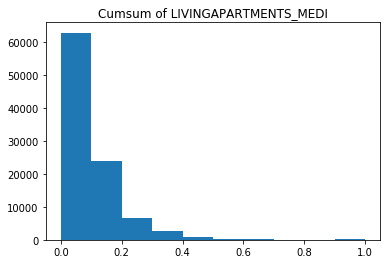

Data name: LIVINGAREA_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.11 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.11 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.96 ~        -0.95


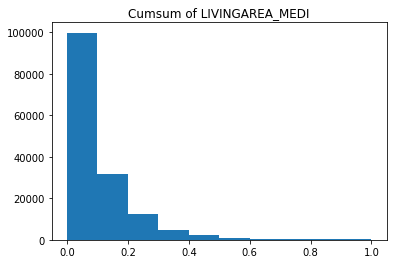

Data name: NONLIVINGAPARTMENTS_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.01 ~         0.05

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.01 ~         0.05

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.06 ~        -1.32


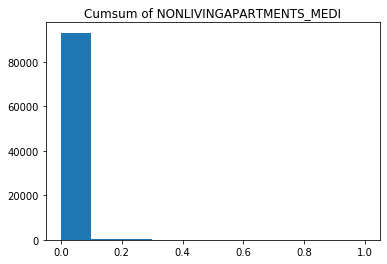

Data name: NONLIVINGAREA_MEDI
Data range: [        0.00 -         1.00]
Data dist :          0.03 ~         0.07

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.03 ~         0.07

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.55 ~        -1.15


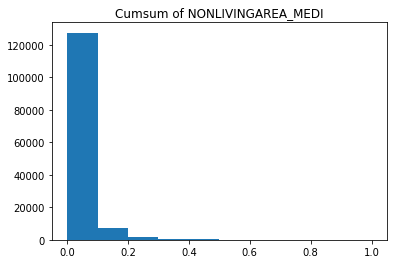

Data name: TOTALAREA_MODE
Data range: [        0.00 -         1.00]
Data dist :          0.10 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.10 ~         0.11

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.99 ~        -0.97


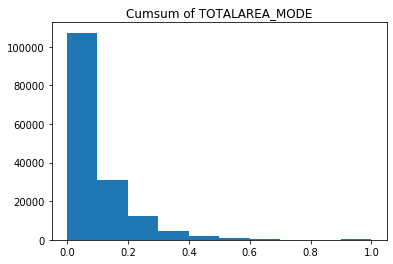

Data name: OBS_30_CNT_SOCIAL_CIRCLE
Data range: [        0.00 -       348.00]
Data dist :          1.42 ~         2.40

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.01

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.39 ~        -2.16


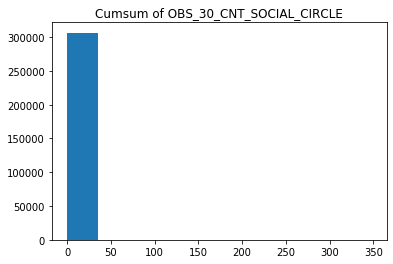

Data name: DEF_30_CNT_SOCIAL_CIRCLE
Data range: [        0.00 -        34.00]
Data dist :          0.14 ~         0.45

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.01

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.37 ~        -1.88


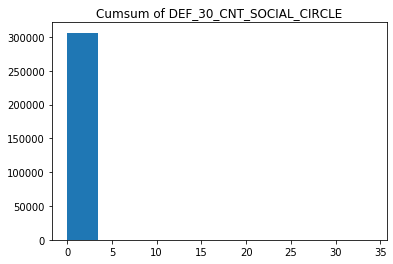

Data name: OBS_60_CNT_SOCIAL_CIRCLE
Data range: [        0.00 -       344.00]
Data dist :          1.41 ~         2.38

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.01

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.39 ~        -2.16


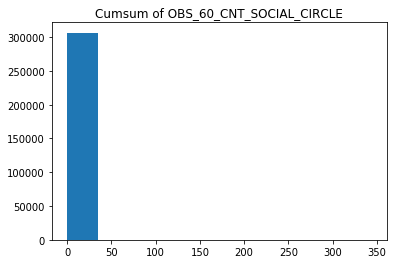

Data name: DEF_60_CNT_SOCIAL_CIRCLE
Data range: [        0.00 -        24.00]
Data dist :          0.10 ~         0.36

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.02

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.38 ~        -1.82


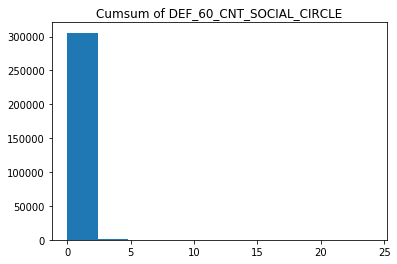

Data name: DAYS_LAST_PHONE_CHANGE
Data range: [    -4292.00 -         0.00]
Data dist :       -962.86 ~       826.81

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.78 ~         0.19

In log
Data range: [        0.00 -       100.00]
Data dist :         -0.11 ~        -0.72


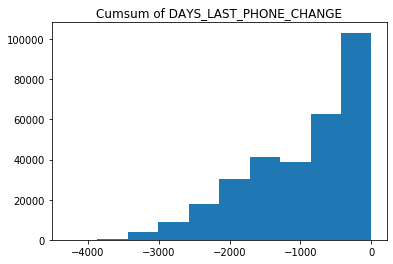

Data name: AMT_REQ_CREDIT_BUREAU_HOUR
Data range: [        0.00 -         4.00]
Data dist :          0.01 ~         0.08

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.02

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.80 ~        -1.68


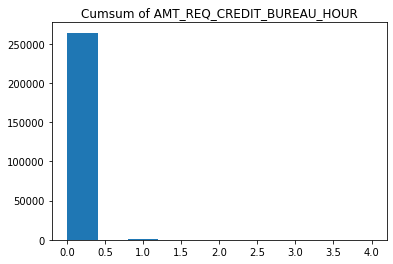

Data name: AMT_REQ_CREDIT_BUREAU_DAY
Data range: [        0.00 -         9.00]
Data dist :          0.01 ~         0.11

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.01

In log
Data range: [        0.00 -       100.00]
Data dist :         -3.11 ~        -1.91


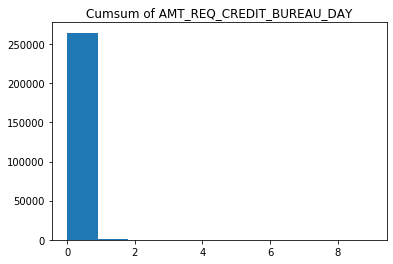

Data name: AMT_REQ_CREDIT_BUREAU_WEEK
Data range: [        0.00 -         8.00]
Data dist :          0.03 ~         0.20

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.03

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.37 ~        -1.59


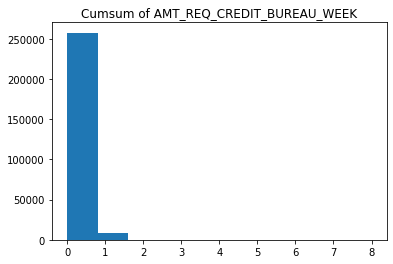

Data name: AMT_REQ_CREDIT_BUREAU_MON
Data range: [        0.00 -        27.00]
Data dist :          0.27 ~         0.92

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.01 ~         0.03

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.00 ~        -1.47


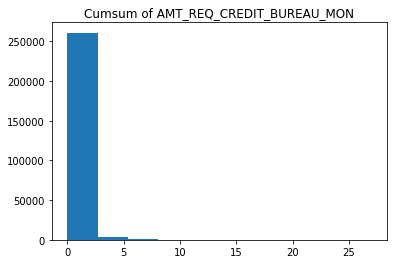

Data name: AMT_REQ_CREDIT_BUREAU_QRT
Data range: [        0.00 -       261.00]
Data dist :          0.27 ~         0.79

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.00 ~         0.00

In log
Data range: [        0.00 -       100.00]
Data dist :         -2.99 ~        -2.52


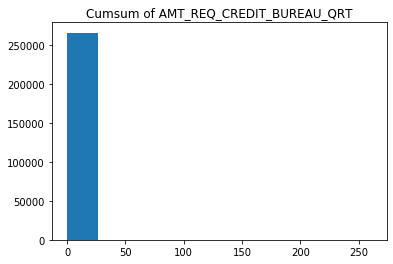

Data name: AMT_REQ_CREDIT_BUREAU_YEAR
Data range: [        0.00 -        25.00]
Data dist :          1.90 ~         1.87

In percentage
Data range: [        0.00 -       100.00]
Data dist :          0.08 ~         0.07

In log
Data range: [        0.00 -       100.00]
Data dist :         -1.12 ~        -1.13


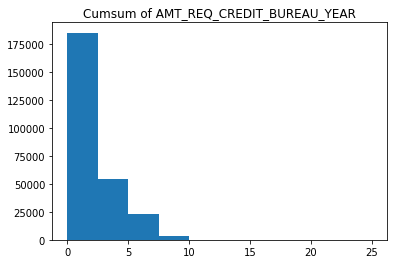

In [73]:
import scipy

# 先篩選數值型的欄位

# Choose only float and integer
dtype_select = ['float64', 'int64'] 
type_is_requested = list(app_train.dtypes.isin(dtype_select))
numeric_columns = list(app_train.columns[type_is_requested])

# Remove types that has more than 2 values
type_has_multi_values = app_train[numeric_columns].apply(lambda x:len(x.unique()) > 2)
numeric_columns = list(app_train[numeric_columns].columns[list(type_has_multi_values)])

print("Numbers of remain columns: %d" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    data = app_train[col]  
    vmax = data.max()
    vmin = data.min()
    vmean = data.mean()
    vstd = data.std()
    print("Data name: %s" % col)
    print("Data range: [%12.2f - %12.2f]" % (vmin, vmax))
    print("Data dist :  %12.2f ~ %12.2f" % (vmean, vstd))
    print("\nIn percentage")
    print("Data range: [%12.2f - %12.2f]" % (0.0, 100.0))
    print("Data dist :  %12.2f ~ %12.2f" % ((vmean - vmin) / (vmax - vmin), (vstd / (vmax - vmin))))
    print("\nIn log")
    print("Data range: [%12.2f - %12.2f]" % (0.0, 100.0))
    print("Data dist :  %12.2f ~ %12.2f" % (np.log10((vmean - vmin) / (vmax - vmin)), np.log10((vstd / (vmax - vmin)))))
    
    [fig,axes] = plt.subplots()
    plt.hist(data)
    axes.set_title('Cumsum of %s' % col)
    plt.show()


In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


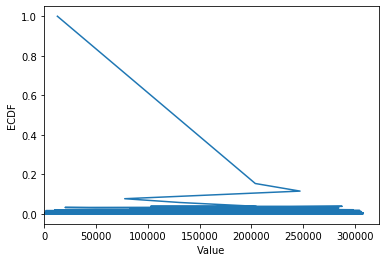

C:\Users\hheart1920\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


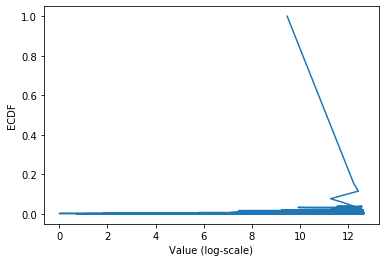

In [90]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
data = app_train['AMT_INCOME_TOTAL']
ser = pd.Series(data).si

print(ser.head())

cdf = ser

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()